For this assignment on the supervised machine learning, I chose the Mushroom dataset, for which we will be training different machine learning algorithms to predict if a mushroom is poisonous or not depending on their features.

Let's begin

Importing the necessary libraries and dependancies

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier

from math import sqrt

Reading the csv file and taking a look at the data

In [64]:
mushrooms_df = pd.read_csv("mushrooms.csv")
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Let's look for any nun values and check if the data types are correct

In [65]:
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Nothing out of the ordinary so we are moving on to looking into some more info that might show some possible outliers

In [66]:
mushrooms_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Since most of the data is marked with letters there doesn't seem to be any outliers. Let's check for null values once again more clearly

In [67]:
mushrooms_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Let's prepare our data by transforming the letters into numeric values so they can be used by the machine learning models.

In [68]:
le = LabelEncoder()

for x in mushrooms_df.select_dtypes(["object_"]).columns:
    mushrooms_df[x] = le.fit_transform(mushrooms_df[x]).astype("int64")
    
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [69]:
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

Now we can make a heatmap to find any interesting relationships between our features

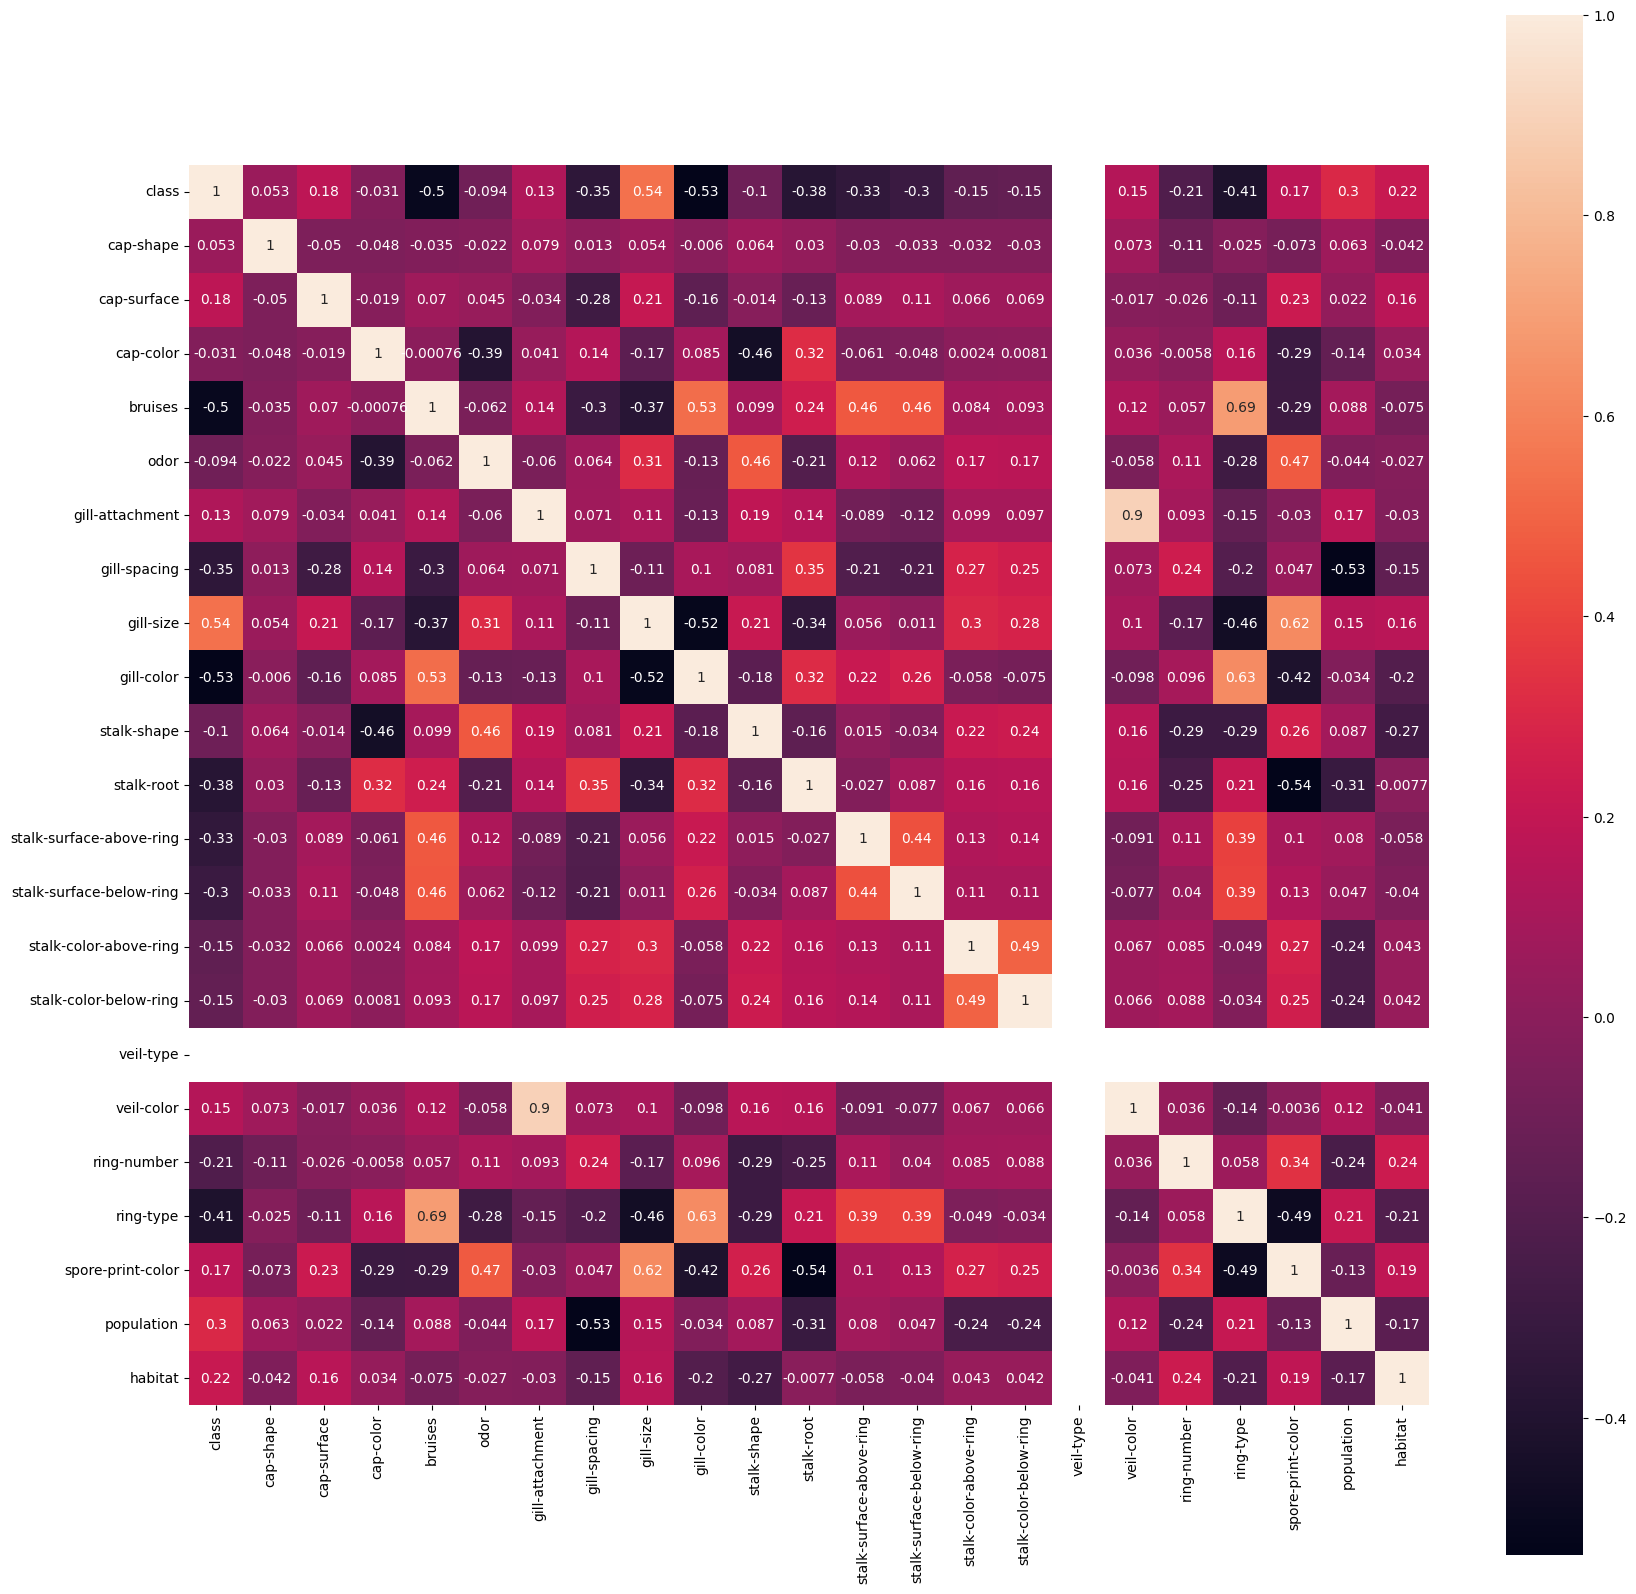

In [70]:
plt.figure(1, figsize=(20,20) )
sns.heatmap(mushrooms_df.corr(), cmap="rocket", annot=True, square=True)
plt.show()

We can also plot the distribution of our features

array([[<AxesSubplot: title={'center': 'class'}>,
        <AxesSubplot: title={'center': 'cap-shape'}>,
        <AxesSubplot: title={'center': 'cap-surface'}>,
        <AxesSubplot: title={'center': 'cap-color'}>,
        <AxesSubplot: title={'center': 'bruises'}>],
       [<AxesSubplot: title={'center': 'odor'}>,
        <AxesSubplot: title={'center': 'gill-attachment'}>,
        <AxesSubplot: title={'center': 'gill-spacing'}>,
        <AxesSubplot: title={'center': 'gill-size'}>,
        <AxesSubplot: title={'center': 'gill-color'}>],
       [<AxesSubplot: title={'center': 'stalk-shape'}>,
        <AxesSubplot: title={'center': 'stalk-root'}>,
        <AxesSubplot: title={'center': 'stalk-surface-above-ring'}>,
        <AxesSubplot: title={'center': 'stalk-surface-below-ring'}>,
        <AxesSubplot: title={'center': 'stalk-color-above-ring'}>],
       [<AxesSubplot: title={'center': 'stalk-color-below-ring'}>,
        <AxesSubplot: title={'center': 'veil-type'}>,
        <AxesSubplo

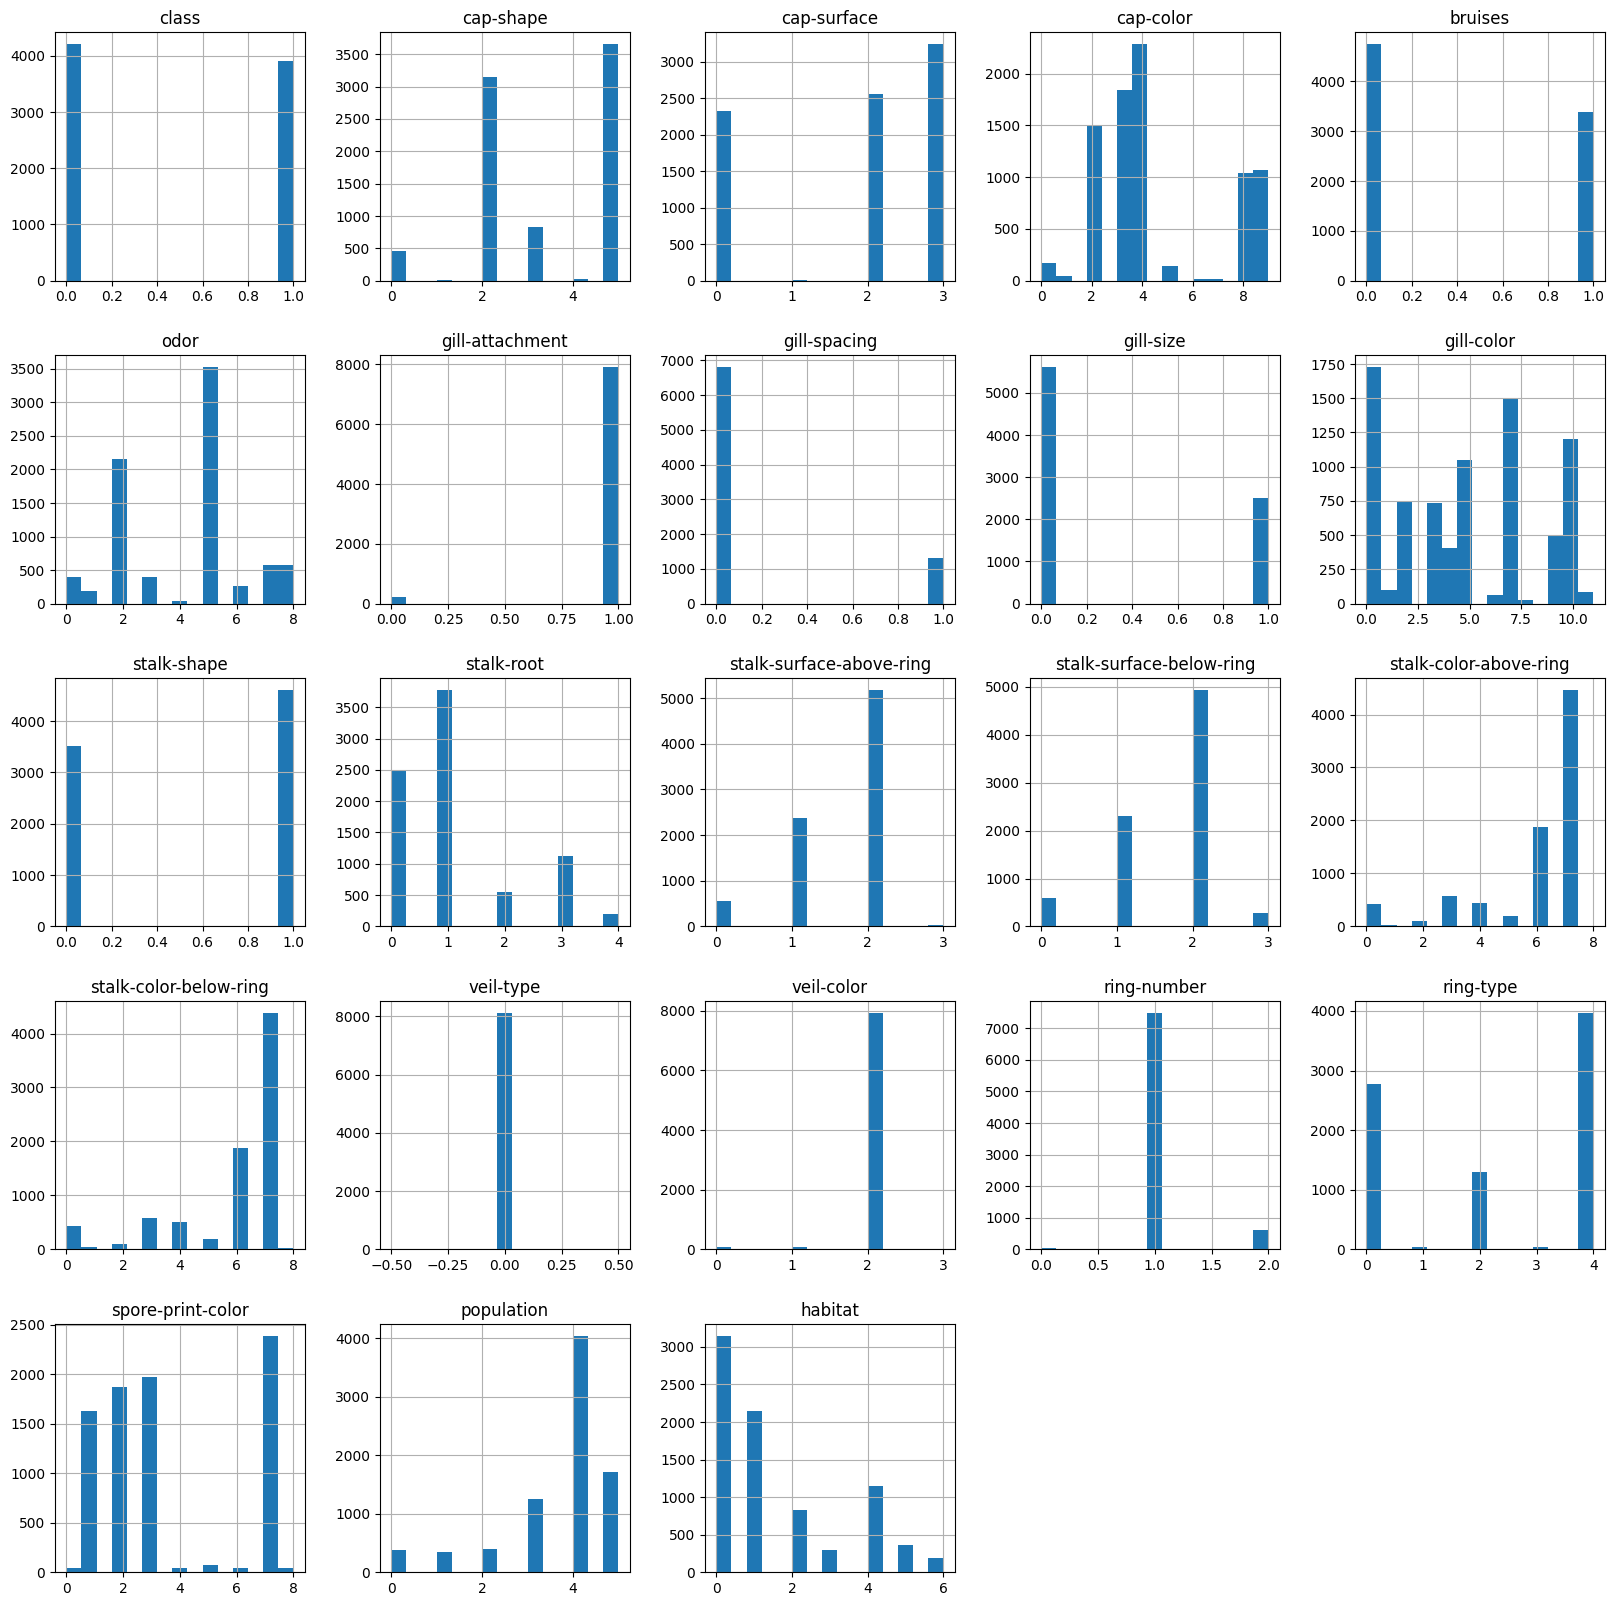

In [71]:
mushrooms_df.hist(bins=15, figsize=(20,20))

We can see that the 'veil-type' column has only one unique entry, so it does not retain any useful information. We can safely drop the column.

In [72]:
mushrooms_df.drop("veil-type", axis = 1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


The models that are appropriate for supervised machine learning that are also mostly used for classification are:

Logistic Regression,
Decision Tree,
SVM,

Let's see how these all compare

Let's split the data for our models to be trained

In [73]:
X = mushrooms_df.drop(['class'], axis=1)
y = mushrooms_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Standardising the data with a scaler

In [74]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train) # Scaling  training set
X_test = scaler_X.transform(X_test) # Scaling test set

Running a logistic regression model and running an accuracy score

In [75]:
logisticRegression_model = LogisticRegression(random_state=0) # Logistic Regression model
logisticRegression_model.fit(X_train, y_train) # Training the model

y_pred = logisticRegression_model.predict(X_test) # Predict the response

accuracy_score(y_test, y_pred)

0.9563076923076923

Making a confusion matrix

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[820,  32],
       [ 39, 734]])

<AxesSubplot: >

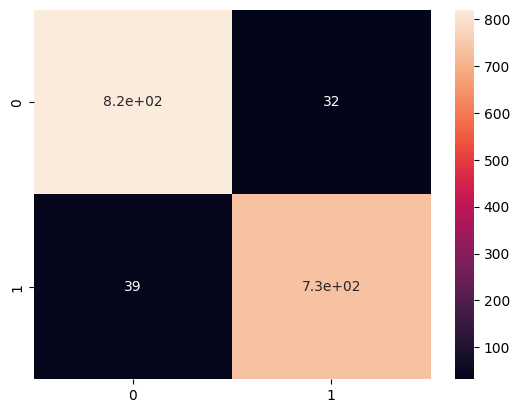

In [96]:
sns.heatmap(cm, annot=True)

Plotting the auc curve

AUC: 0.955994


Text(0.5, 0, 'False Positive Rate')

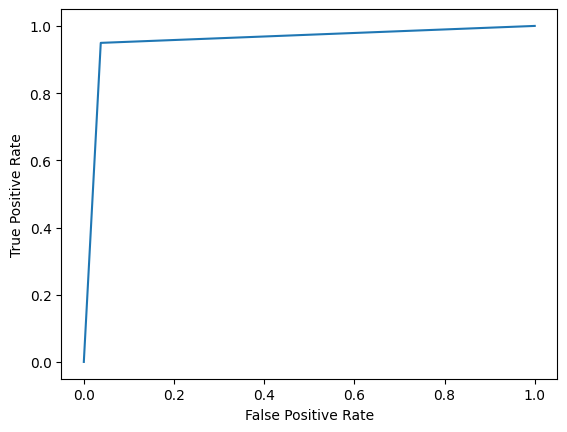

In [77]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test, y_pred)[0:2]

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

And also checking the F score

In [78]:
fscore = f1_score(y_test, y_pred)
print('F_score: %f' %fscore)

F_score: 0.953866


Creating a Decision Tree classifier, use entropy criterion and max depth, as well as fitting the trees.

In [79]:
decisionTree_model_gini = DecisionTreeClassifier()

decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

Making a prediction and printing some accuracy metrics

In [80]:

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

print("Accuracy (gini):",metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (depth3):",metrics.accuracy_score(y_test, y_pred_depth3))

Accuracy (gini): 1.0
Accuracy (entropy): 1.0
Accuracy (depth3): 0.9606153846153846


Confusion matrix for each case

In [81]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_depth3 = confusion_matrix(y_test, y_pred_depth3)

print(cm_gini)
print(cm_entropy)
print(cm_depth3)


[[852   0]
 [  0 773]]
[[852   0]
 [  0 773]]
[[806  46]
 [ 18 755]]


ROC curves for each case

In [82]:
auc_gini = roc_auc_score(y_test, y_pred_gini)
auc_entropy = roc_auc_score(y_test, y_pred_entropy)
auc_depth3 = roc_auc_score(y_test, y_pred_depth3)
print('AUC: %f' %auc_gini)
print('AUC: %f' %auc_entropy)
print('AUC: %f' %auc_depth3)

fpr_gini, tpr_gini = roc_curve(y_test, y_pred_gini)[0:2]
fpr_entropy, tpr_entropy = roc_curve(y_test, y_pred_entropy)[0:2]
fpr_depth3, tpr_depth3 = roc_curve(y_test, y_pred_depth3)[0:2]


AUC: 1.000000
AUC: 1.000000
AUC: 0.961362


Text(0.5, 0, 'False Positive Rate')

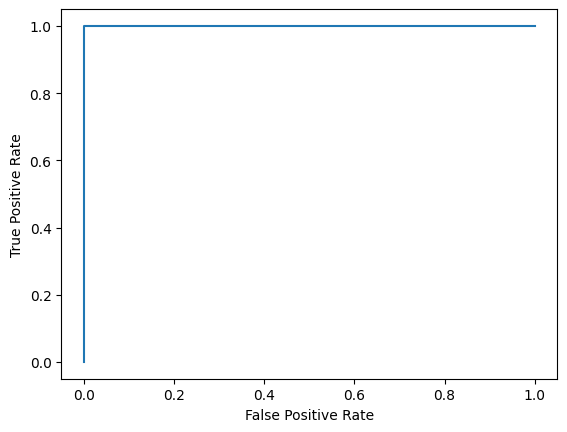

In [83]:

plt.plot(fpr_gini, tpr_gini)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


Text(0.5, 0, 'False Positive Rate')

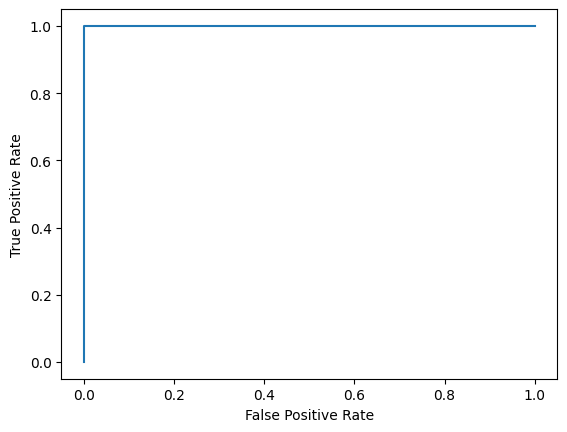

In [84]:

plt.plot(fpr_entropy, tpr_entropy)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


Text(0.5, 0, 'False Positive Rate')

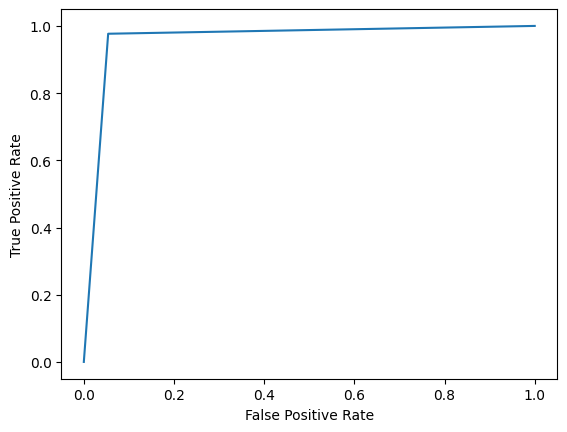

In [85]:

plt.plot(fpr_depth3, tpr_depth3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

F score for each case

In [86]:
fscore_gini = f1_score(y_test, y_pred_gini)
print('F_score: %f' %fscore)

fscore_entropy = f1_score(y_test, y_pred_entropy)
print('F_score: %f' %fscore)

fscore_depth3 = f1_score(y_test, y_pred_depth3)
print('F_score: %f' %fscore)

F_score: 0.953866
F_score: 0.953866
F_score: 0.953866


Creating a SVM classifier and training the model using traning sets

In [87]:

#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clfLinear.fit(X_train, y_train)


SVC(kernel='linear')

Making predictions and calculating the accuracy

In [88]:
y_pred_svm = clfLinear.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9901538461538462


Confusion matrix for SVM

In [89]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[839,  13],
       [  3, 770]])

ROC curve for SVM

AUC: 0.955994


Text(0.5, 0, 'False Positive Rate')

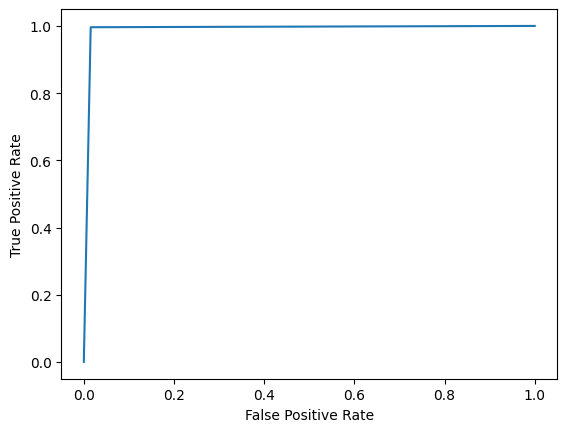

In [90]:
auc_svm = roc_auc_score(y_test, y_pred_svm)
print('AUC: %f' %auc)

fpr_svm, tpr_svm = roc_curve(y_test, y_pred_svm)[0:2]

plt.plot(fpr_svm, tpr_svm)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

F score for SVM

In [91]:
fscore_svm = f1_score(y_test, y_pred_svm)
print('F_score: %f' %fscore_svm)

F_score: 0.989717


The conclusion is that we got some perfect learners, and that is probably a case of overfitting models.